In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.options.display.max_rows = 10
plt.style.use('fivethirtyeight')

# Exercise 5.1

In [59]:
headers = ['q' + str(c) for c in range(1,18)]
df = pd.DataFrame.from_csv('house-votes-84.data',index_col=None, header=None)
df.columns = headers; df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [60]:
df[df=='y'] = 1.0
df[df=='n'] = 0.0
for i in range(2,18):
    head = 'q' + str(i)
    df.loc[df[head]=='?',head] = df.loc[df[head]!='?',head].mean()
df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
0,republican,0,1,0,1,1,1,0,0,0,1,0.362319,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0.812689
2,democrat,0.44208,1,1,0.417453,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0.504762,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0.423267,1,1,1,1


# Exercise 5.2

In [61]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Exercise 5.3

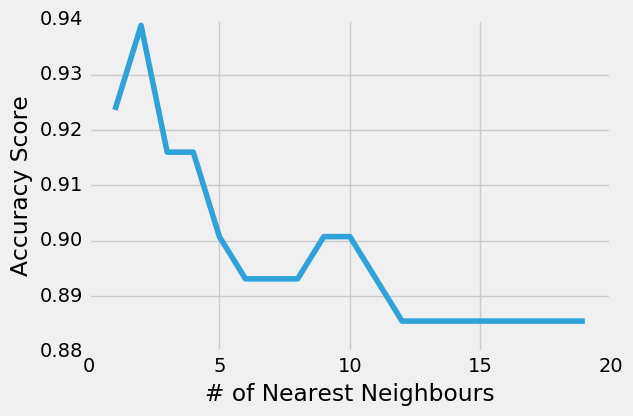

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
score = []
k_val = [k for k in range(1,20)]
for k in k_val:
    model = KNeighborsClassifier(n_neighbors=k)
    fit = model.fit(X_train,y_train)
    y_pred = fit.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
plt.plot(k_val,score);
plt.ylabel('Accuracy Score')
plt.xlabel('# of Nearest Neighbours');

# Exercise 5.4

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
scoreLR = accuracy_score(y_test,y_pred); scoreLR

0.92366412213740456

# Exercise 5.5

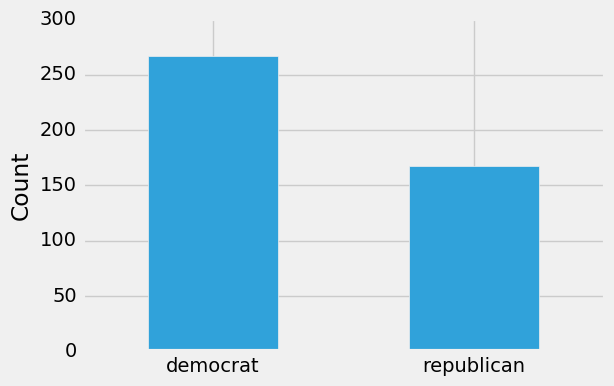

In [64]:
pd.value_counts(y).plot(kind="bar",rot=0)
plt.ylabel('Count');

In [65]:
def pred_dem(X):
    return ['democrat' for d in range(len(X))]
def pred_rep(X):
    return ['republican' for d in range(len(X))]
y_pred = pred_dem(X_test)
scoreDem = accuracy_score(y_test,y_pred)
y_pred = pred_rep(X_test)
scoreRep = accuracy_score(y_test,y_pred)
print('Guess-Dem Score:',scoreDem,'Guess-Rep Score',scoreRep)

Guess-Dem Score: 0.63358778626 Guess-Rep Score 0.36641221374


# Exercise 5.6

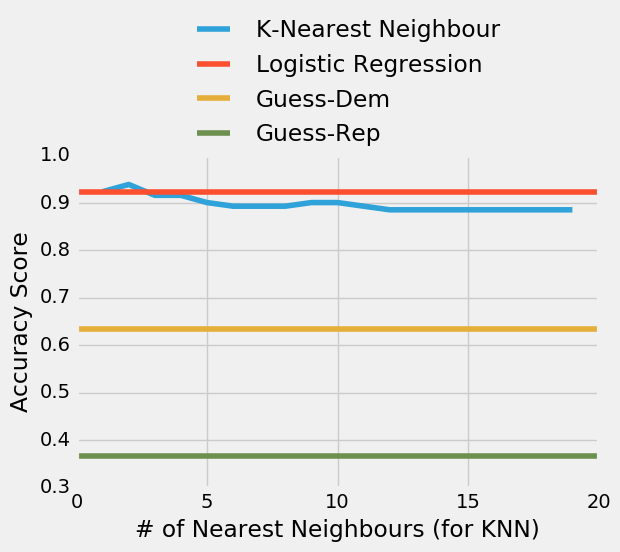

In [66]:
plt.plot(k_val,score);
plt.plot([0,20],[scoreLR,scoreLR]);
plt.plot([0,20],[scoreDem,scoreDem]);
plt.plot([0,20],[scoreRep,scoreRep]);
plt.ylabel('Accuracy Score')
plt.xlabel('# of Nearest Neighbours (for KNN)')
plt.legend(['K-Nearest Neighbour','Logistic Regression','Guess-Dem','Guess-Rep'],loc=[0.2,1]);

# Exercise 5.7

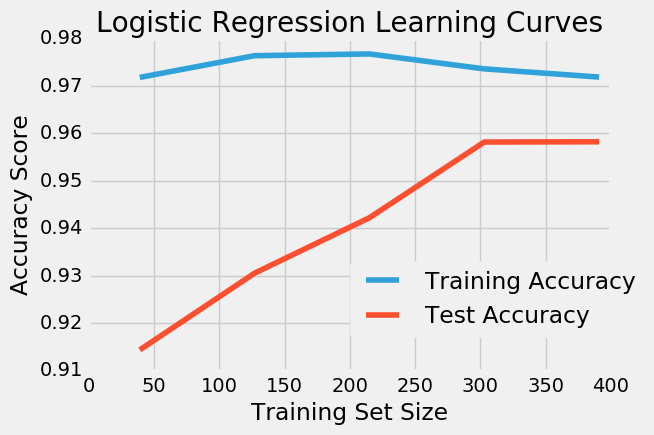

In [67]:
from sklearn.learning_curve import learning_curve
m, train_err, test_err = learning_curve(LogisticRegression(), X, y, cv=10)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)
plt.plot(m,train_cv_err)
plt.plot(m,test_cv_err)
plt.ylabel('Accuracy Score')
plt.xlabel('Training Set Size')
plt.legend(['Training Accuracy','Test Accuracy'],loc=[0.5,0.1]);
plt.title('Logistic Regression Learning Curves');

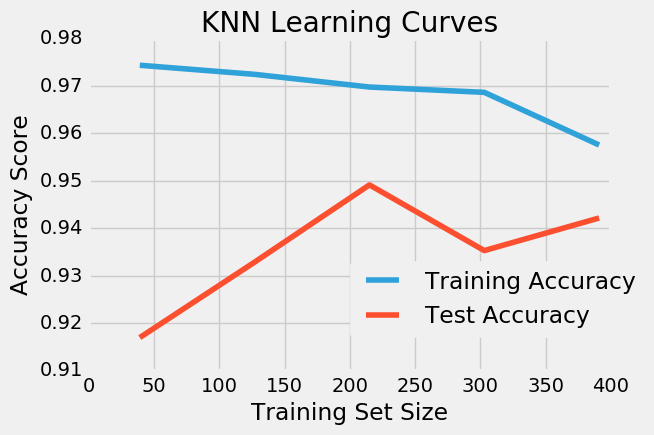

In [68]:
m, train_err, test_err = learning_curve(KNeighborsClassifier(n_neighbors=4), X, y, cv=10)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)
plt.plot(m,train_cv_err)
plt.plot(m,test_cv_err)
plt.ylabel('Accuracy Score')
plt.xlabel('Training Set Size')
plt.legend(['Training Accuracy','Test Accuracy'],loc=[0.5,0.1]);
plt.title('KNN Learning Curves');

# Exercise 5.8

In [69]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
score = accuracy_score(y_test,y_pred); 
print('Gaussian NB:',score)

Gaussian NB: 0.908396946565


In [70]:
from sklearn.svm import SVC
model = SVC()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
score = accuracy_score(y_test,y_pred);
print('SVC:',score)

SVC: 0.931297709924


In [71]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
score = accuracy_score(y_test,y_pred);
print('Decision Tree:',score)

Decision Tree: 0.916030534351


In [72]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
score = accuracy_score(y_test,y_pred); 
print('Random Forest:',score)

Random Forest: 0.93893129771


# Exercise 5.9

In [73]:
from sklearn.cross_validation import cross_val_score
score = np.mean(cross_val_score(LogisticRegression(), X, y, cv=10))
print('Logistic Regression:',score)

Logistic Regression: 0.958227625088


In [74]:
score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=4), X, y, cv=10))
print('KNN:',score)

KNN: 0.939773985704


In [75]:
score = np.mean(cross_val_score(GaussianNB(), X, y, cv=10))
print('Gaussian NB:',score)

Gaussian NB: 0.939773985704


In [76]:
score = np.mean(cross_val_score(SVC(), X, y, cv=10))
print('SVC:',score)

SVC: 0.958280479211


In [77]:
score = np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10))
print('Decision Tree:',score)

Decision Tree: 0.932907983489


In [78]:
score = np.mean(cross_val_score(RandomForestClassifier(), X, y, cv=10))
print('Random Forest:',score)

Random Forest: 0.958282996074


# Exercise 5.10

In [79]:
headers = ['q' + str(c) for c in range(1,18)]
df = pd.DataFrame.from_csv('house-votes-84.data',index_col=None, header=None)
df.columns = headers
df[df=='y'] = 1.0
df[df=='n'] = 0.0
for i in range(2,18):
    head = 'q' + str(i)
    df.loc[df[head]=='?',head] = round(df.loc[df[head]!='?',head].mean())
df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [80]:
X = df.iloc[:,2:]
y = df.iloc[:,1]
y[y==1] = 'y'
y[y==0] = 'n'
score = np.mean(cross_val_score(LogisticRegression(), X, y, cv=10))
print('Logistic Regression:',score)

Logistic Regression: 0.687355280379


In [81]:
score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=4), X, y, cv=10))
print('K-Nearest Neighbour:',score)

K-Nearest Neighbour: 0.661595187758


# Exercise 5.11

In [82]:
df = pd.DataFrame.from_csv('zscores.csv',index_col=None); df.head()
df.metacritic[df.metacritic>0] = 'Thumbs Up'
df.metacritic[df.metacritic!='Thumbs Up'] = 'Thumbs Down'

/Users/Bob/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


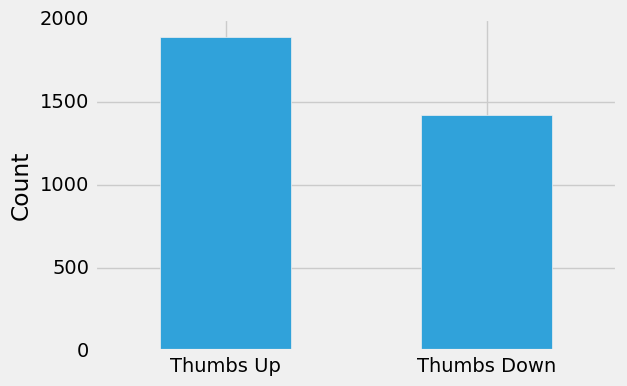

In [83]:
X = df.loc[:,['director','imdb','likes','writer','actor3','actor2','actor1','year']]
y = df.loc[:,'metacritic']
pd.value_counts(y).plot(kind="bar",rot=0)
plt.ylabel('Count');

In [84]:
score0 = len(y[y=='Thumbs Up'])/len(y)
print('Baseline:',score0)

Baseline: 0.5703101475459199


In [85]:
scoreKNN = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=4), X, y, cv=10))
print('K-Nearest Neighbour:',scoreKNN)

K-Nearest Neighbour: 0.694668918181


In [86]:
scoreLR = np.mean(cross_val_score(LogisticRegression(), X, y, cv=10))
print('Logistic Regression:',scoreLR)

Logistic Regression: 0.793739575487


In [87]:
model = LogisticRegression()
fit = model.fit(X,y)
for i in range(len(list(fit.coef_[0]))):
    beta = fit.coef_[0][i]
    print(X.columns[i],' beta:',fit.coef_[0][i])

director  beta: 0.239752106591
imdb  beta: 2.37091630909
likes  beta: -0.291752650366
writer  beta: 0.166684422709
actor3  beta: -0.129549264302
actor2  beta: -0.0284187477123
actor1  beta: -0.17417371626
year  beta: 0.000113961641674


It makes sense that the IMDB score of the movie is the strongest classifier for the movie's metacritic score bin (i.e. 'Thumbs Up' or 'Thumbs Down')

# Exercise 5.12

In [88]:
headers = ['age','year','nodes','survival']
df = pd.DataFrame.from_csv('haberman.data',index_col=None, header=None)
df.columns = headers; df.head()

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


What is the average and standard deviation of the age of all of the patients?

In [89]:
print('Mean:',df['age'].mean(),'Standard Deviation',df['age'].std())

Mean: 52.45751633986928 Standard Deviation 10.80345234930328


What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

In [90]:
print('Mean:',df.loc[df['survival']==1,'age'].mean(),'Standard Deviation',df.loc[df['survival']==1,'age'].std())

Mean: 52.01777777777778 Standard Deviation 11.012154179929546


What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

In [91]:
print('Mean:',df.loc[df['survival']==2,'age'].mean(),'Standard Deviation',df.loc[df['survival']==2,'age'].std())

Mean: 53.67901234567901 Standard Deviation 10.16713720829741


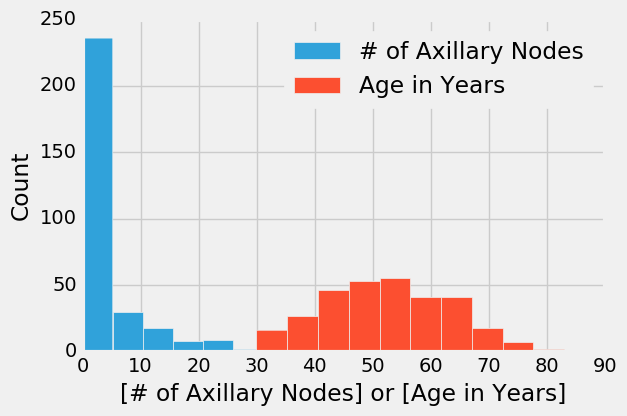

In [92]:
plt.hist(df['nodes']);
plt.hist(df['age']);
plt.xlabel('[# of Axillary Nodes] or [Age in Years]')
plt.ylabel('Count')
plt.legend(['# of Axillary Nodes','Age in Years'])

What is the earliest year of surgery in this dataset?

In [93]:
print('Earliest surgery year:','19'+str(min(df['year'])))

Earliest surgery year: 1958


What is the most recent year of surgery in this dataset?

In [94]:
print('Most recent surgery year:','19'+str(max(df['year'])))

Most recent surgery year: 1969


In [95]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
y[y==2] = 0 #makes more sense if survival=0 means patient did not survive within 5 years
score = np.mean(cross_val_score(LogisticRegression(), X, y, cv=10))
print('Logistic Regression:',score)

Logistic Regression: 0.751659946237


In [96]:
model = LogisticRegression()
fit = model.fit(X,y)
for i in range(len(list(fit.coef_[0]))):
    beta = fit.coef_[0][i]
    print(X.columns[i],'beta:',fit.coef_[0][i])

age beta: -0.0185468891258
year beta: 0.0345457979869
nodes beta: -0.0881231404745


Increasing age, number of nodes decreases the likelihood of survival.

Surgeries performed later increases the likelihood of survival.

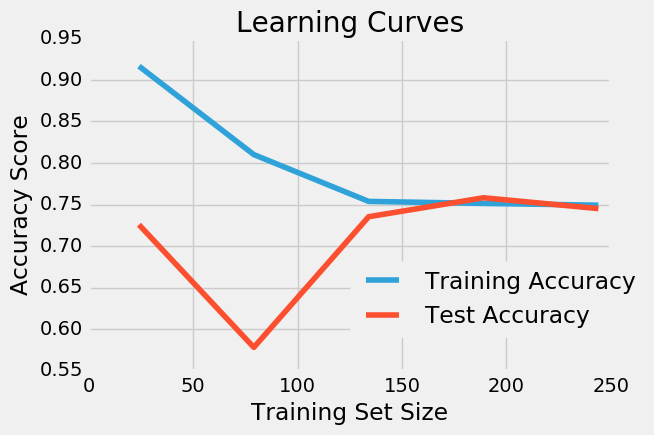

In [97]:
m, train_err, test_err = learning_curve(LogisticRegression(), X, y, cv=5)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)
plt.plot(m,train_cv_err)
plt.plot(m,test_cv_err)
plt.ylabel('Accuracy Score')
plt.xlabel('Training Set Size')
plt.legend(['Training Accuracy','Test Accuracy'],loc=[0.5,0.1]);
plt.title('Learning Curves');